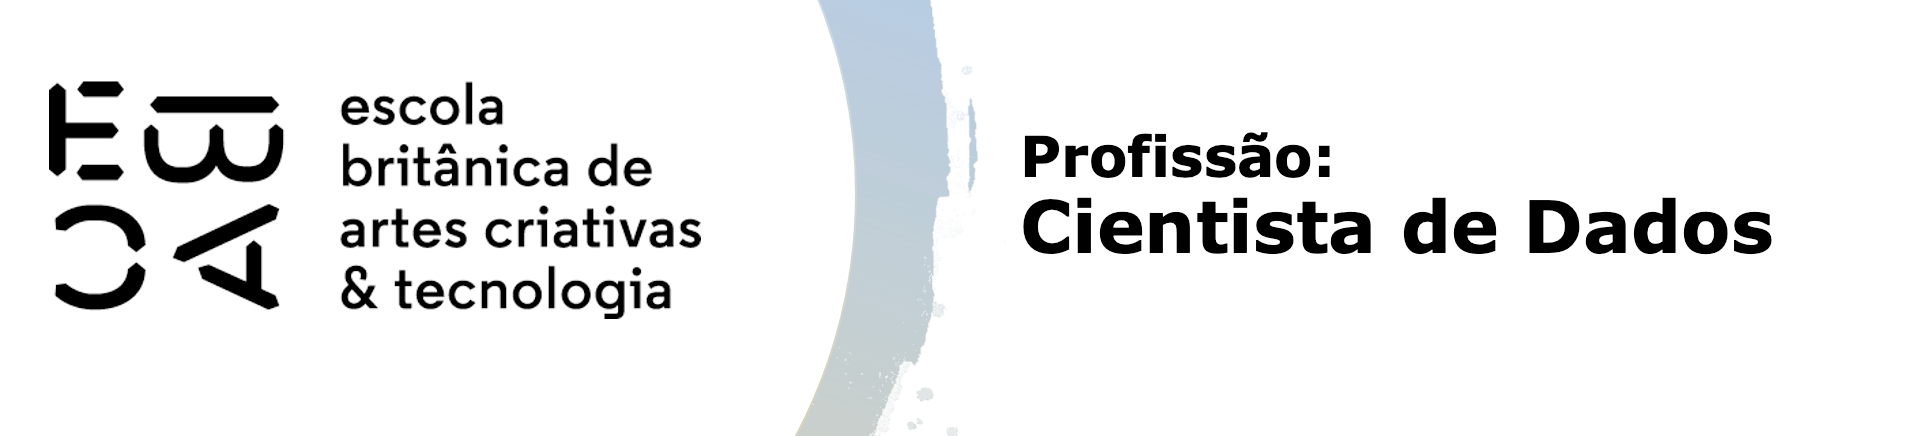

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df = df.loc[(df['Administrative'] < 25) 
            & (df['Administrative_Duration'] < 2500) 
            & (df['Informational'] < 15) 
            & (df['Informational_Duration'] < 1500) 
            & (df['ProductRelated'] < 540) 
            & (df['ProductRelated_Duration'] < 19000)]

df = df.sort_index()
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12301 rows x 18 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12301 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12301 non-null  int64  
 1   Administrative_Duration  12301 non-null  float64
 2   Informational            12301 non-null  int64  
 3   Informational_Duration   12301 non-null  float64
 4   ProductRelated           12301 non-null  int64  
 5   ProductRelated_Duration  12301 non-null  float64
 6   BounceRates              12301 non-null  float64
 7   ExitRates                12301 non-null  float64
 8   PageValues               12301 non-null  float64
 9   SpecialDay               12301 non-null  float64
 10  Month                    12301 non-null  object 
 11  OperatingSystems         12301 non-null  int64  
 12  Browser                  12301 non-null  int64  
 13  Region                   12301 non-null  int64  
 14  TrafficType           

In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
def plotly_uni(var):
    fig = px.histogram(df, x=df[var],
                   marginal="box")
    fig.show()

In [9]:
plotly_uni('Administrative')

In [10]:
plotly_uni('Administrative_Duration')

In [11]:
plotly_uni('Informational')

In [12]:
plotly_uni('Informational_Duration')

In [13]:
plotly_uni('ProductRelated')

In [14]:
plotly_uni('ProductRelated_Duration')

### Limpeza dos dados

 - Nota-se que possui alguns outliers em algumas variaveis.
 - Foi selecionado as Variaveis que mais importam para o Exercicio.

In [15]:
df = df.loc[(df['Administrative'] < 25) 
            & (df['Administrative_Duration'] < 2500) 
            & (df['Informational'] < 15) 
            & (df['Informational_Duration'] < 1500) 
            & (df['ProductRelated'] < 540) 
            & (df['ProductRelated_Duration'] < 19000)]

df = df.sort_index()
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12301 rows x 18 columns]

In [16]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration' ]

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [17]:
X_pad = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns=df[variaveis].columns )
X_pad

Administrative  Administrative_Duration  Informational  \
0           -0.698952                -0.474742      -0.401608   
1           -0.698952                -0.474742      -0.401608   
2           -0.698952                -0.474742      -0.401608   
3           -0.698952                -0.474742      -0.401608   
4           -0.698952                -0.474742      -0.401608   
...               ...                      ...            ...   
12296        0.213347                 0.394483      -0.401608   
12297       -0.698952                -0.474742      -0.401608   
12298       -0.698952                -0.474742      -0.401608   
12299        0.517446                -0.025143      -0.401608   
12300       -0.698952                -0.474742      -0.401608   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
0                   -0.262898       -0.720671                -0.696023  
1                   -0.262898       -0.696845                -0.657813  
2                   -0.262898       -0.720671                -0.696023  
3                   -0.262898       -0.696845                -0.694431  
4                   -0.262898       -0.506235                -0.321379  
...                       ...             ...                      ...  
12296               -0.262898        0.518296                 0.368976  
12297               -0.262898       -0.625366                -0.417951  
12298               -0.262898       -0.601540                -0.586018  
12299               -0.262898       -0.387103                -0.489447  
12300               -0.262898       -0.673019                -0.683336  

[12301 rows x 6 columns]

### MÉTODO DO COTOVELO

In [18]:
SQD = []
K = range(1, 15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(X_pad)
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

In [19]:
SQD

[73805.99999999991,
 49894.12307077166,
 41863.66764187059,
 35051.8354245338,
 30968.49246223934,
 27500.15448496906,
 24429.124451832788,
 22699.50679675044,
 21271.535432092205,
 19908.178451680968,
 18997.786831189216,
 18143.2201003398,
 17339.40598042256,
 16822.152114340824]

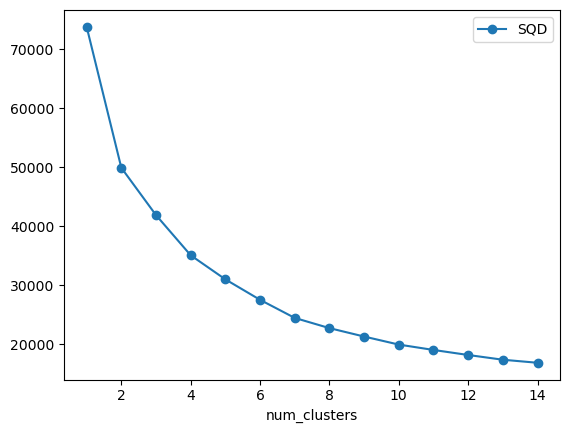

In [20]:
silueta_cluster = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
silueta_cluster.plot(x = 'num_clusters', y = 'SQD', marker='o');

### COEFICIENTE DA SILUETA

In [21]:
# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(X_pad[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(X_pad[variaveis], km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    X_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

<AxesSubplot:xlabel='n_clusters'>

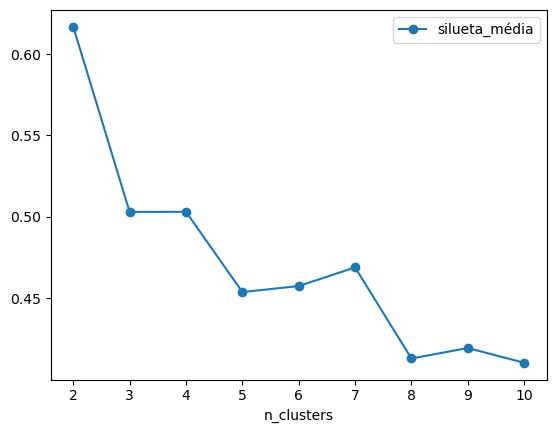

In [22]:
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})
df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [23]:
X_pad

Administrative  Administrative_Duration  Informational  \
0           -0.698952                -0.474742      -0.401608   
1           -0.698952                -0.474742      -0.401608   
2           -0.698952                -0.474742      -0.401608   
3           -0.698952                -0.474742      -0.401608   
4           -0.698952                -0.474742      -0.401608   
...               ...                      ...            ...   
12296        0.213347                 0.394483      -0.401608   
12297       -0.698952                -0.474742      -0.401608   
12298       -0.698952                -0.474742      -0.401608   
12299        0.517446                -0.025143      -0.401608   
12300       -0.698952                -0.474742      -0.401608   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.262898       -0.720671                -0.696023   
1                   -0.262898       -0.696845                -0.657813   
2                   -0.262898       -0.720671                -0.696023   
3                   -0.262898       -0.696845                -0.694431   
4                   -0.262898       -0.506235                -0.321379   
...                       ...             ...                      ...   
12296               -0.262898        0.518296                 0.368976   
12297               -0.262898       -0.625366                -0.417951   
12298               -0.262898       -0.601540                -0.586018   
12299               -0.262898       -0.387103                -0.489447   
12300               -0.262898       -0.673019                -0.683336   

      grupos_2 grupos_3 grupos_4 grupos_5 grupos_6 grupos_7 grupos_8 grupos_9  \
0      grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_0  grupo_1   
1      grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_0  grupo_1   
2      grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_0  grupo_1   
3      grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_0  grupo_1   
4      grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_0  grupo_1   
...        ...      ...      ...      ...      ...      ...      ...      ...   
12296  grupo_0  grupo_1  grupo_0  grupo_2  grupo_1  grupo_6  grupo_7  grupo_4   
12297  grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_0  grupo_1   
12298  grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_0  grupo_1   
12299  grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_7  grupo_4   
12300  grupo_0  grupo_1  grupo_0  grupo_3  grupo_4  grupo_0  grupo_0  grupo_1   

      grupos_10  
0       grupo_6  
1       grupo_6  
2       grupo_6  
3       grupo_6  
4       grupo_6  
...         ...  
12296   grupo_0  
12297   grupo_6  
12298   grupo_6  
12299   grupo_1  
12300   grupo_6  

[12301 rows x 15 columns]

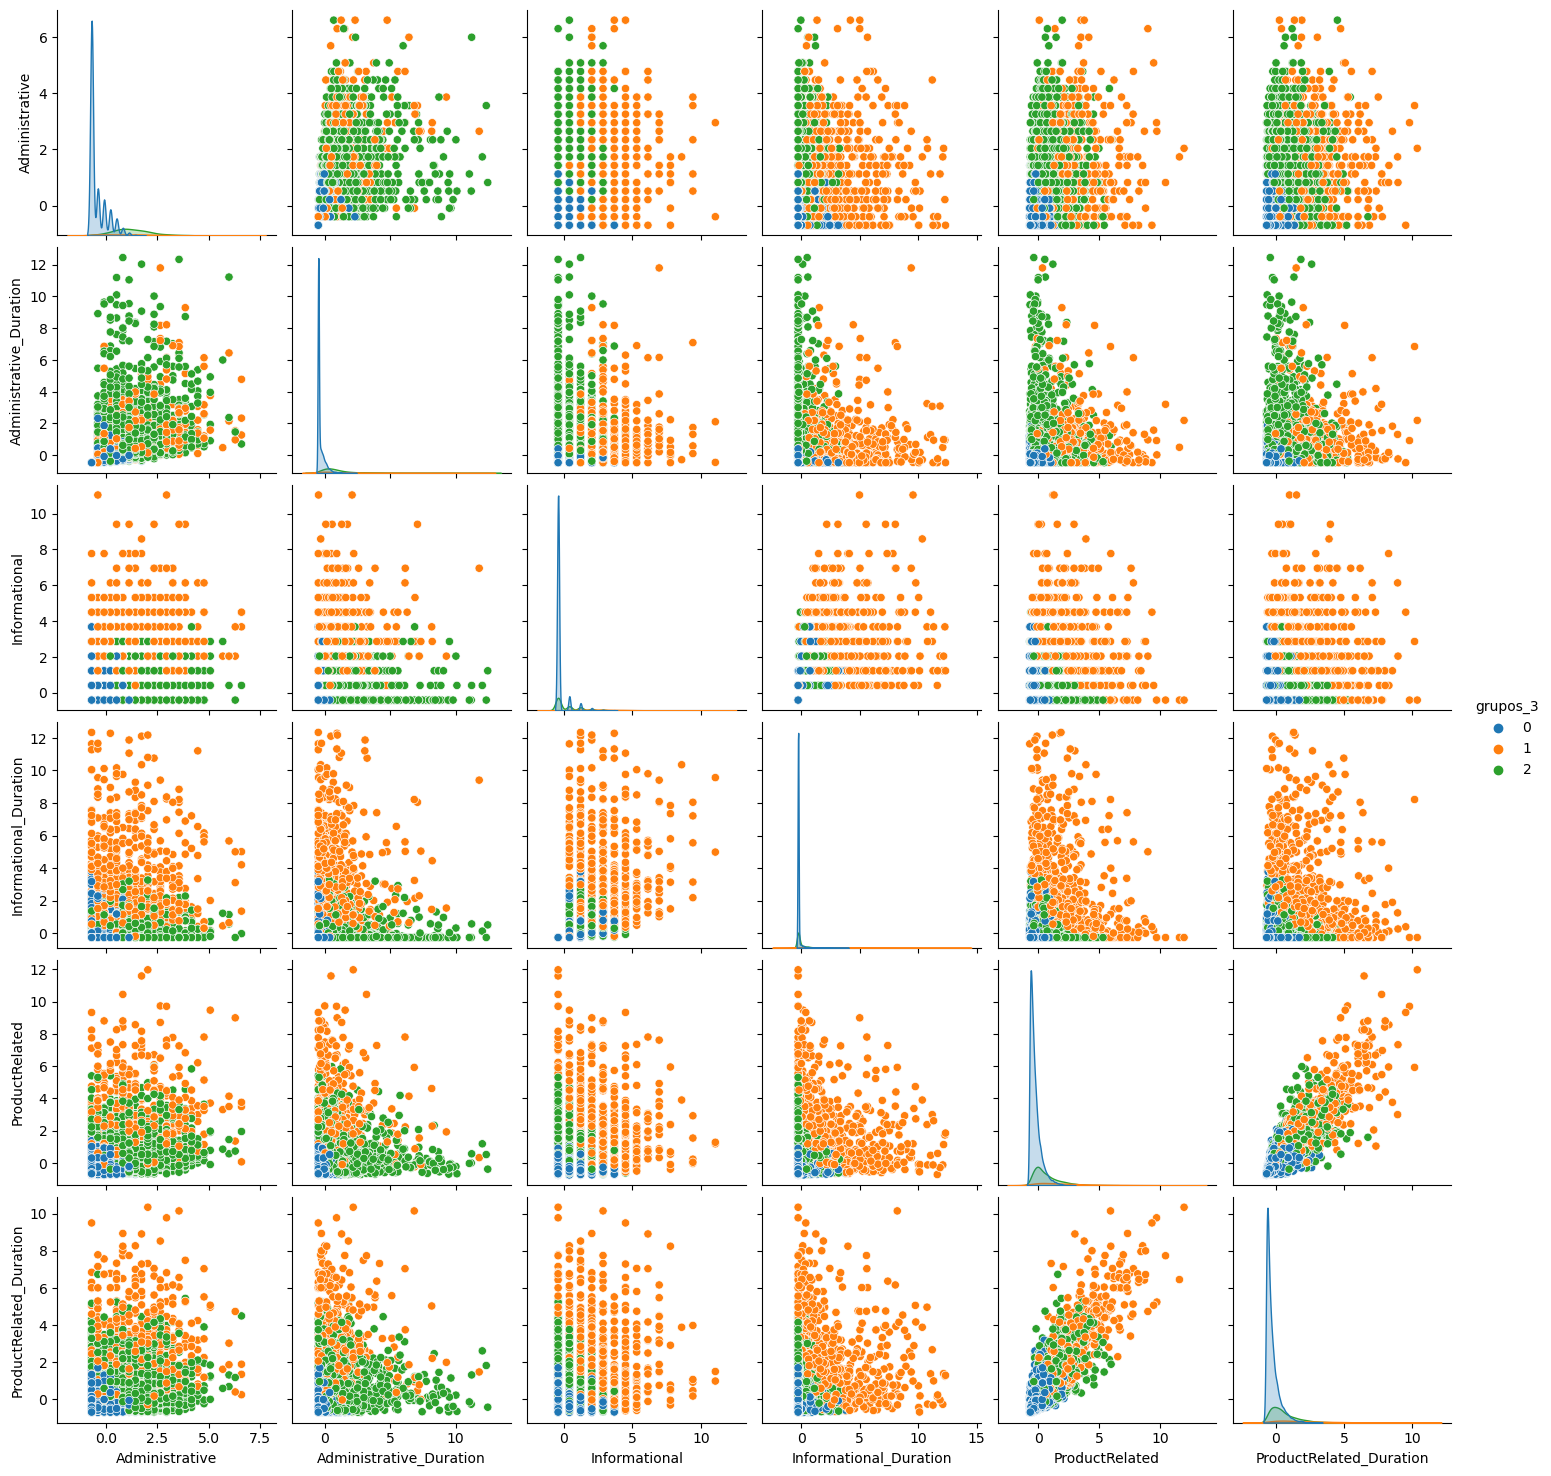

In [24]:
cluster = KMeans(n_clusters=3)
cluster.fit_predict(X_pad[variaveis])
X_pad['grupos_3'] = pd.Categorical(cluster.labels_)

sns.pairplot(X_pad, hue='grupos_3')

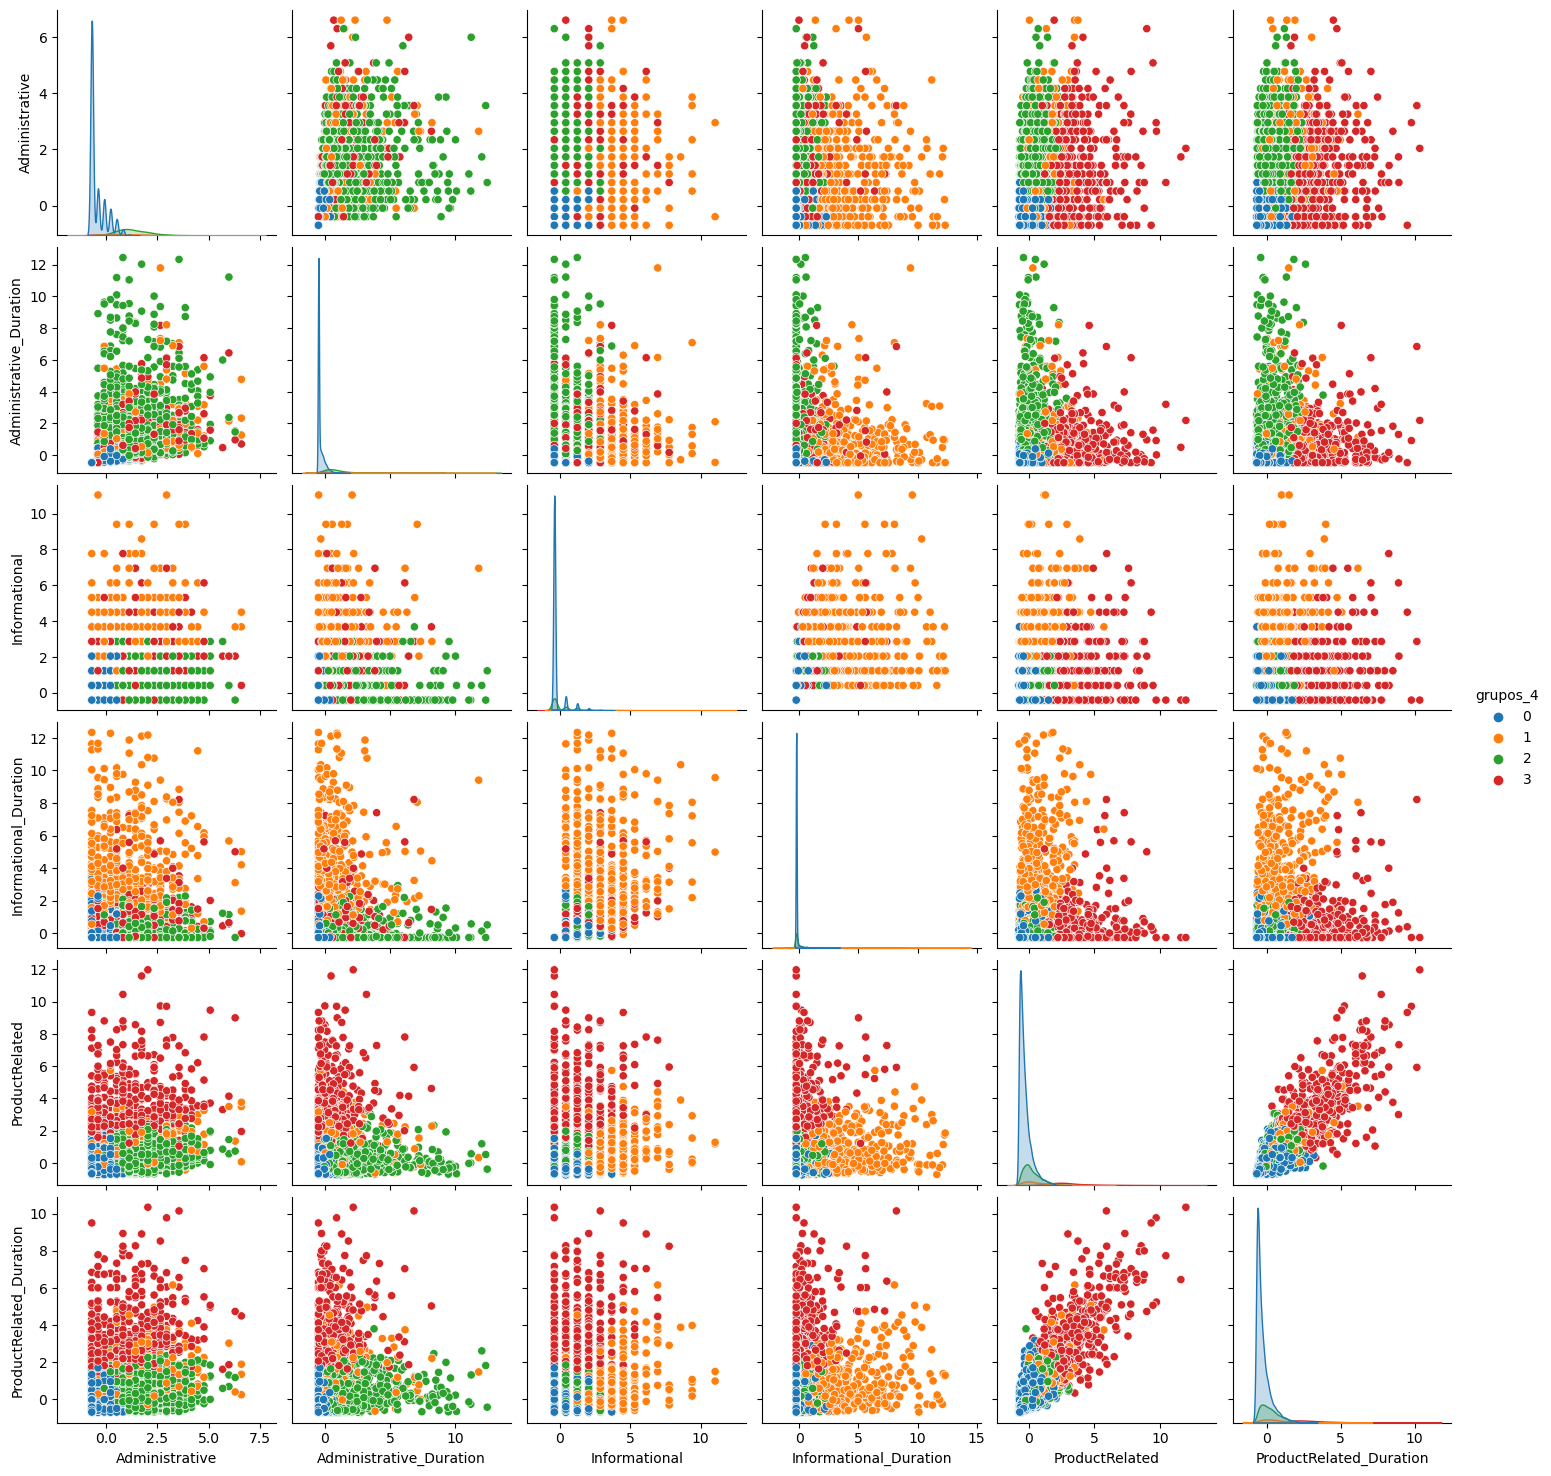

In [25]:
cluster = KMeans(n_clusters=4)
cluster.fit_predict(X_pad[variaveis])
X_pad['grupos_4'] = pd.Categorical(cluster.labels_)

sns.pairplot(X_pad, hue='grupos_4')

### Numero de Clusters

 - 4 Clusters parece o numero mais ideal.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [28]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X_pad[variaveis])

In [29]:
X_pad['y'] = df.Revenue

In [32]:
pd.crosstab(X_pad.y, X_pad.grupos_4, normalize='columns')

grupos_4         0         1         2         3
y                                               
False     0.851488  0.826168  0.829136  0.820702
True      0.148512  0.173832  0.170864  0.179298

In [33]:
pd.crosstab(X_pad.y, X_pad.grupos_4)

grupos_4     0    1     2    3
y                             
False     7809  442  1679  444
True      1362   93   346   97

## Análise 

Analisando me parece que o grupo 2 é o o que possui maior numero de compradores.